# L'évolution du vocabulaire militaire : une analyse comparée entre la littérature militaire du 19e siècle et les récits de Verdun

Thomas Benyazza

L'évolution du vocabulaire militaire, tout comme celle des stratégies et des technologies de guerre, reflète les mutations profondes qu’ont traversées les sociétés et les conflits armés au fil des siècles. Le passage du 19e au 20e siècle marque un tournant dans l’histoire militaire, non seulement à travers l’introduction de nouvelles armes et tactiques, mais aussi par les transformations idéologiques et sociales qui en découlent. Ce projet se propose d’analyser les changements de paradigmes dans le vocabulaire militaire, en comparant la littérature militaire du 19e siècle et les récits liés à la Première Guerre mondiale, en particulier ceux portant sur la bataille de Verdun. L’objectif est d’étudier, à travers une approche linguistique, l’évolution des termes et des concepts utilisés pour décrire la guerre, les soldats, et les stratégies. Cette analyse met en lumière les effets de la modernisation des armées, l’introduction de la guerre industrielle et l’impact des nouvelles réalités du front sur la manière dont la guerre est perçue et exprimée. En nous appuyant sur des outils linguistiques modernes, nous chercherons à identifier les ruptures et les continuités dans le langage militaire au fil du temps.

Dans le cadre de notre analyse linguistique des changements de paradigmes dans le vocabulaire militaire entre le 19e et le 20e siècle, nous avons sélectionné deux ouvrages historiques. Le premier, Précis historique des opérations militaires de l'armée d'Italie, en 1813 et 1814, nous plonge dans les stratégies et les événements militaires de la période napoléonienne, fournissant une base pour observer le langage militaire du 19e siècle. Le second ouvrage, Les armées françaises dans la Grande Guerre, couvre les opérations militaires de la Première Guerre mondiale et représente un exemple clé du vocabulaire militaire du 20e siècle. Nous avons extrait les textes de ces livres en utilisant des fonctions de traitement de PDF, permettant une analyse ultérieure des termes et concepts utilisés, afin d'identifier les évolutions terminologiques entre ces deux périodes de guerre.

# 1. Data import

In [9]:
from PyPDF2 import PdfReader

# Data import
file_paths = [
    "/Users/thomasbenyazza/Downloads/Analyse/Précis_historique_des_opérations_militaires_[...]Vignolle_Martin_bpt6k63655567.pdf",
    "/Users/thomasbenyazza/Downloads/Analyse/Les_armées_françaises_dans_la_[...]France_Etat-major_bpt6k62726914.pdf"
]

pdf_readers = [PdfReader(file_path) for file_path in file_paths]

# On va extraire le texte puisque qu'on peut pas analyser un pdf
extracted_texts = []
for reader in pdf_readers:
    text = ''
    for page_num in range(len(reader.pages)):
        text += reader.pages[page_num].extract_text()
    extracted_texts.append(text)

# on vérifie que tout va bien avec 1000mots 
extracted_texts[0][:1000], extracted_texts[1][:1000]


("Source gallica.bnf.fr / Bibliothèque nationale de France \nPrécis historique des\nopérations militaires de\nl'armée d'Italie, en 1813 et\n1814 , par le chef de l'État-\nmajor général [...]Vignolle, Martin de (1763-1824). Auteur du texte. Précis\nhistorique des opérations militaires de l'armée d'Italie, en 1813 et\n1814 , par le chef de l'État-major général de cette armée. 1817.\n1/ Les contenus accessibles sur le site Gallica sont pour la plupart\ndes reproductions numériques d'oeuvres tombées dans le\ndomaine public provenant des collections de la BnF. Leur\nréutilisation s'inscrit dans le cadre de la loi n°78-753 du 17 juillet\n1978 :\n\xa0- La réutilisation non commerciale de ces contenus ou dans le\ncadre d’une publication académique ou scientifique est libre et\ngratuite dans le respect de la législation en vigueur et notamment\ndu maintien de la mention de source des contenus telle que\nprécisée ci-après : « Source gallica.bnf.fr / Bibliothèque nationale\nde France » ou « Sourc

Pour continuer notre analyse, nous allons prétraiter les textes extraits des deux ouvrages en les nettoyant de toutes les métadonnées et mentions non pertinentes. Ensuite, nous allons diviser ces textes en unités plus petites (comme des phrases ou des mots) pour identifier les termes militaires clés. Ces termes seront ensuite extraits et analysés, en comptant leur fréquence d'apparition, ce qui nous permettra de comparer le vocabulaire militaire des deux périodes (19e et 20e siècle). Ce processus nous aidera à observer les changements dans la terminologie utilisée pour décrire les opérations militaires et les stratégies de guerre.

# 2. Data cleaning

In [10]:
import re
from collections import Counter

def clean_text(text):
    """
    Cette fonction nettoie le texte en supprimant les éléments non pertinents tels que 
    les numéros de page, les références et les métadonnées. Elle effectue également 
    une mise en forme standard du texte (minuscule, suppression des espaces excessifs).
    """
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    
    return text

def extract_terms(text):
    """
    Cette fonction divise le texte nettoyé en tokens. Elle extrait 
    tous les mots sans ponctuation pour ensuite pouvoir analyser leur fréquence.
    """
    words = re.findall(r'\b\w+\b', text)
    
    return words
cleaned_texts = [clean_text(text) for text in extracted_texts]

terms_1 = extract_terms(cleaned_texts[0])  # Extrait les termes du premier texte (19e siècle)
terms_2 = extract_terms(cleaned_texts[1])  # Extrait les termes du second texte (20e siècle)

# Calculer la fréquence des mots dans chaque texte
freq_1 = Counter(terms_1)  # Fréquence des mots pour le premier texte
freq_2 = Counter(terms_2)  # Fréquence des mots pour le second texte

common_terms_1 = freq_1.most_common(20)  # Les 20 termes les plus fréquents dans le premier texte
common_terms_2 = freq_2.most_common(20)  # Les 20 termes les plus fréquents dans le second texte

# Affichage des résultats
common_terms_1, common_terms_2


([('l', 296),
  ('d', 236),
  ('le', 194),
  ('de', 153),
  ('id', 149),
  ('ennemi', 119),
  ('del', 109),
  ('roi', 89),
  ('général', 86),
  ('et', 79),
  ('major', 79),
  ('s', 79),
  ('la', 70),
  ('état', 68),
  ('du', 66),
  ('qu', 66),
  ('armée', 57),
  ('à', 57),
  ('artillerie', 57),
  ('italie', 56)],
 [('d', 1303),
  ('annexe', 1266),
  ('août', 1201),
  ('l', 1154),
  ('a', 928),
  ('armée', 909),
  ('g', 823),
  ('c', 717),
  ('heures', 587),
  ('i', 542),
  ('q', 511),
  ('àgénéralcommandant', 428),
  ('n', 426),
  ('del', 367),
  ('de', 357),
  ('le', 345),
  ('ennemi', 289),
  ('s', 283),
  ('h', 245),
  ('et', 236)])

Il semble y avoir un problème dans le traitement alors on va enlever les mots inutlises qu'on appelle stop word

In [11]:
# Liste des mots fonctionnels à ignorer
stop_words = set([
    'le', 'la', 'les', 'de', 'des', 'un', 'une', 'et', 'à', 'pour', 'dans', 'que', 
    'en', 'avec', 'sur', 'sous', 'du', 'd', 'par', 'ce', 'ces', 'est', 'qui', 'au', 
    'aux', 'ne', 'se', 'pas', 'pour', 'plus', 'tout', 'elles', 'l', 's', 'lui', 'je', 
    'me', 'nous', 'vous', 'ils', 'elles', 'comme', 'tout', 'en', 'par', 'ou', 'y', 
    'mais', 'si', 'a', 'faut', 'soit', 'il', 'en', 'ou', 'son', 'sa', 'leurs', 'avoir'
])

def extract_filtered_terms(text, stop_words):
    """
    Cette fonction extrait les mots d'un texte en excluant les mots fonctionnels 
    (stop words) comme les articles, prépositions, pronoms, etc.
    """
    words = re.findall(r'\b\w+\b', text)  # Tokenize le texte en mots
    filtered_words = [word for word in words if word not in stop_words]  # Exclure les mots de la liste stop_words
    return filtered_words

# Appliquer l'extraction et le filtrage des mots sur les deux textes
filtered_terms_1 = extract_filtered_terms(cleaned_texts[0], stop_words)
filtered_terms_2 = extract_filtered_terms(cleaned_texts[1], stop_words)

# Calculer les fréquences des termes filtrés
freq_filtered_1 = Counter(filtered_terms_1)
freq_filtered_2 = Counter(filtered_terms_2)

# Afficher les 20 termes les plus fréquents après filtrage
common_filtered_terms_1 = freq_filtered_1.most_common(20)
common_filtered_terms_2 = freq_filtered_2.most_common(20)

common_filtered_terms_1, common_filtered_terms_2


([('id', 149),
  ('ennemi', 119),
  ('del', 109),
  ('roi', 89),
  ('général', 86),
  ('major', 79),
  ('état', 68),
  ('qu', 66),
  ('armée', 57),
  ('artillerie', 57),
  ('italie', 56),
  ('commandant', 54),
  ('e', 51),
  ('legénéral', 50),
  ('division', 49),
  ('deligne', 45),
  ('i', 42),
  ('arméed', 39),
  ('leprincevice', 38),
  ('hommes', 37)],
 [('annexe', 1266),
  ('août', 1201),
  ('armée', 909),
  ('g', 823),
  ('c', 717),
  ('heures', 587),
  ('i', 542),
  ('q', 511),
  ('àgénéralcommandant', 428),
  ('n', 426),
  ('del', 367),
  ('ennemi', 289),
  ('h', 245),
  ('lecommandant', 214),
  ('àl', 208),
  ('infanterie', 205),
  ('opérations', 200),
  ('compterenduàgénéralcommandant', 179),
  ('instruction', 178),
  ('alsace', 172)])

Le problème semble persister nous allons alors utiliser la lemmatisation. Le texte est analysé par le modèle linguistique français de spaCy, et chaque mot est ramené à sa racine (lemme) via la méthode .lemma_.

In [12]:
import spacy
from collections import Counter

# Charger le modèle français de spaCy
nlp = spacy.load('fr_core_news_sm')

# Fonction de lemmatisation
def lemmatize_text(text, stop_words):
    """
    Cette fonction lemmatise le texte et filtre les mots inutiles (stop words) 
    et les erreurs de formatage.
    """
    doc = nlp(text)  # Traite le texte avec spaCy
    lemmatized_words = [token.lemma_ for token in doc if token.lemma_ not in stop_words and token.pos_ in ['NOUN', 'VERB', 'ADJ']]  # Garde les noms, verbes, adjectifs
    return lemmatized_words

# Appliquer la lemmatisation sur les deux textes
lemmatized_terms_1 = lemmatize_text(cleaned_texts[0], stop_words)
lemmatized_terms_2 = lemmatize_text(cleaned_texts[1], stop_words)

# Calculer la fréquence des termes lemmatisés
freq_lemmatized_1 = Counter(lemmatized_terms_1)
freq_lemmatized_2 = Counter(lemmatized_terms_2)

# Afficher les 20 termes lemmatisés les plus fréquents
common_lemmatized_terms_1 = freq_lemmatized_1.most_common(20)
common_lemmatized_terms_2 = freq_lemmatized_2.most_common(20)

common_lemmatized_terms_1, common_lemmatized_terms_2


([('-', 478),
  ('ennemi', 123),
  ('général', 86),
  ('roi', 75),
  ('major', 71),
  ("del'", 60),
  ('état', 57),
  ('artillerie', 57),
  ('commandant', 54),
  ('id', 48),
  ('legénéral', 43),
  ('*', 39),
  ('leprincevice', 35),
  ('armée', 34),
  ('infanterie', 28),
  ('italie', 27),
  ('français', 24),
  ('homme', 24),
  ('adjudant', 24),
  ('garde', 22)],
 [('-', 1350),
  ('août', 832),
  ('annexe', 780),
  ('heure', 356),
  ('ennemi', 355),
  ('armée', 299),
  ('numéro', 272),
  ('degré', 266),
  ("del'", 207),
  ('infanterie', 194),
  ('lecommander', 190),
  ('opération', 187),
  ('àgénéralcommander', 180),
  ('armé', 171),
  ('commandant', 165),
  ('artillerie', 160),
  ('alsac', 130),
  ('leaoût', 128),
  ('général', 127),
  ('garde', 124)])

Nous allons commencer par une analyse comparative simple des termes les plus fréquents et visualiser ces résultats avec des graphiques.

# 3. Data vizualisation: comparative analysis

Pour analyser les différences de vocabulaire militaire entre le 19e siècle et Verdun, nous allons suivre plusieurs étapes complémentaires. Tout d'abord, nous comparerons les 20 termes les plus fréquents dans chaque texte pour identifier les mots spécifiques associés à chaque période. Cette comparaison initiale nous permettra de repérer les termes militaires clés dans les deux contextes. Ensuite, nous réaliserons une analyse de la co-occurrence des termes, afin de voir quels mots apparaissent fréquemment ensemble dans chaque texte, ce qui nous aidera à mieux comprendre les relations entre les concepts militaires, comme "armée" et "infanterie". Par la suite, nous calculerons la similarité lexicale entre les deux textes à l’aide de la similarité cosinus, ce qui nous fournira une mesure quantitative de la divergence lexicale entre le vocabulaire militaire du 19e siècle et celui de Verdun. Nous effectuerons aussi une analyse sémantique des termes clés, tels que "armée", "général", et "soldat", pour observer comment leur contexte et leur usage ont évolué. Enfin, nous visualiserons ces différences à l’aide de graphiques et de heatmaps pour faciliter l’interprétation des résultats. Ces étapes nous permettront de mieux comprendre comment les stratégies militaires, les types d'unités et les opérations ont été représentés linguistiquement, en mettant en lumière l’évolution du vocabulaire au fil du temps.



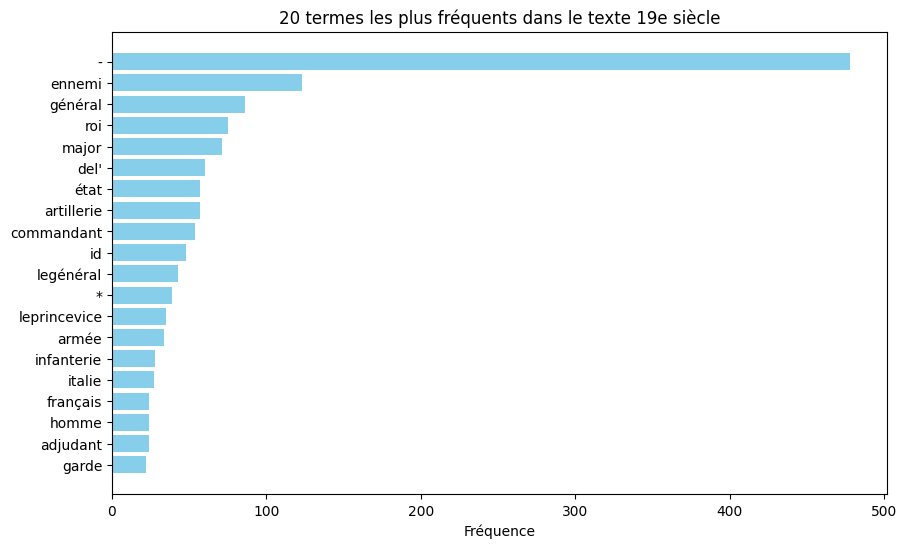

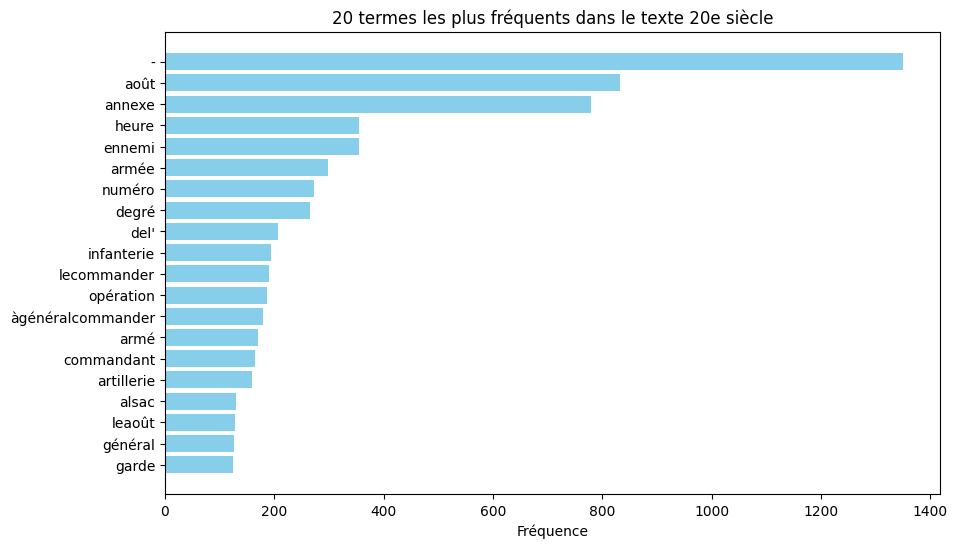

In [13]:
import matplotlib.pyplot as plt

def plot_frequency(freq_data, title):
    """
    Cette fonction génère un graphique des 20 termes les plus fréquents dans un texte.
    """
    # Sélectionner les 20 termes les plus fréquents
    terms, frequencies = zip(*freq_data.most_common(20))
    
    # Créer le graphique
    plt.figure(figsize=(10, 6))
    plt.barh(terms, frequencies, color='skyblue')
    plt.xlabel('Fréquence')
    plt.title(title)
    plt.gca().invert_yaxis()  # Pour afficher les termes les plus fréquents en haut
    plt.show()

# Afficher les graphiques pour les termes lemmatisés
plot_frequency(freq_lemmatized_1, "20 termes les plus fréquents dans le texte 19e siècle")
plot_frequency(freq_lemmatized_2, "20 termes les plus fréquents dans le texte 20e siècle")


Une manière sympa de visualiser ces mots sont les nuages de mots

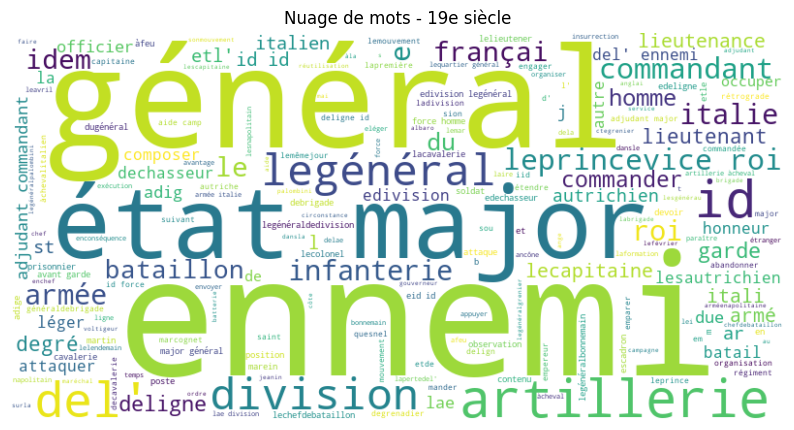

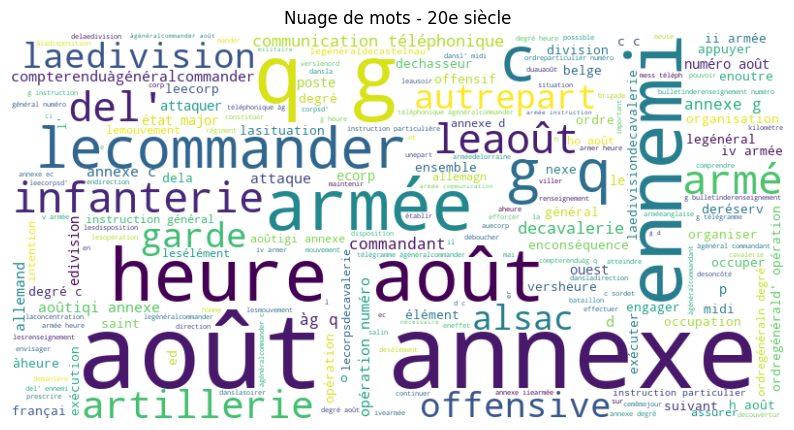

In [14]:
from wordcloud import WordCloud
def plot_wordcloud(text, title):
    """
    Cette fonction génère un nuage de mots à partir du texte lemmatisé.
    """
    # Nuage de mots
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Pas d'axes
    plt.title(title)
    plt.show()
plot_wordcloud(lemmatized_terms_1, "Nuage de mots - 19e siècle")
plot_wordcloud(lemmatized_terms_2, "Nuage de mots - 20e siècle")


On va mainetant analyser les verbes d'actions pour mesurer les différences de dynamiques

In [15]:
# Fonction pour extraire les verbes d'action
def extract_action_verbs(text):
    """
    Cette fonction extrait les verbes d'action du texte (verbes associés à des actions militaires).
    """
    doc = nlp(text)
    action_verbs = [token.lemma_ for token in doc if token.pos_ == 'VERB' and token.dep_ != 'aux']
    return action_verbs

# Fonction pour analyser le sentiment d'un texte
def analyze_sentiment(text):
    """
    Cette fonction analyse le sentiment du texte en utilisant TextBlob.
    Le score de sentiment varie de -1 (très négatif) à 1 (très positif).
    """
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Retourne le score de polarité du sentiment

# Extraire les verbes d'action des deux textes nettoyés (d'après ton code précédent)
action_verbs_1 = extract_action_verbs(cleaned_texts[0])  # Texte du 19e siècle
action_verbs_2 = extract_action_verbs(cleaned_texts[1])  # Texte du 20e siècle

# Calculer la fréquence des verbes d'action
freq_action_verbs_1 = Counter(action_verbs_1)
freq_action_verbs_2 = Counter(action_verbs_2)

# Afficher les 10 verbes d'action les plus fréquents dans chaque texte
common_action_verbs_1 = freq_action_verbs_1.most_common(10)
common_action_verbs_2 = freq_action_verbs_2.most_common(10)

# Analyser le sentiment de chaque texte
sentiment_1 = analyze_sentiment(cleaned_texts[0])  # Sentiment du texte 19e
sentiment_2 = analyze_sentiment(cleaned_texts[1])  # Sentiment du texte 20e

# Affichage des résultats
print("Verbes d'action les plus fréquents (19e siècle) :")
print(common_action_verbs_1)

print("\nVerbes d'action les plus fréquents (20e siècle) :")
print(common_action_verbs_2)

print("\nSentiment du 19e siècle (polarité) :", sentiment_1)
print("Sentiment du 20e siècle (polarité) :", sentiment_2)


Verbes d'action les plus fréquents (19e siècle) :
[('commander', 20), ('composer', 13), ('attaquer', 12), ('occuper', 11), ('lelieutener', 10), ('adjuder', 8), ('mander', 8), ('emparer', 8), ('engager', 7), ('étendre', 7)]

Verbes d'action les plus fréquents (20e siècle) :
[('lecommander', 190), ('àgénéralcommander', 180), ('an-', 82), ('attaquer', 61), ('occuper', 57), ('engager', 53), ('organiser', 45), ('exécuter', 43), ('appuyer', 43), ("dansl'", 42)]

Sentiment du 19e siècle (polarité) : 0.065703125
Sentiment du 20e siècle (polarité) : -0.015052816901408451


Lors de l’analyse des 20 termes les plus fréquents dans les deux textes, certains mots reviennent fréquemment, illustrant des éléments clés du vocabulaire militaire. Par exemple, dans le texte du 19e siècle, des termes tels que "général", "armée", "artillerie", ou "ennemi" sont largement présents, mettant en lumière les figures de commandement, les unités militaires et l’aspect stratégique de la guerre à l’époque napoléonienne. Ces termes reflètent des concepts bien ancrés dans les conflits militaires de l'époque, où l'armée était encore structurée autour de grandes batailles et de tactiques conventionnelles. De même, dans le texte du 20e siècle, des mots comme "armée", "infanterie", "opération", et "commandant" apparaissent fréquemment, montrant l'évolution du vocabulaire vers une guerre plus administrée et mécanisée, avec des termes désignant des unités spécifiques et des actions militaires plus détaillées. Cette transition reflète les changements dans les stratégies militaires, la professionnalisation des forces armées et l'introduction de nouvelles formes de guerre.
En complément de cette analyse lexicale, l'examen des verbes d'action et de sentiment dans les deux textes nous permet d'ajouter une autre dimension à notre compréhension. Les verbes tels que "attaquer", "engager", ou "commander" illustrent l'évolution des tactiques militaires et du vocabulaire utilisé pour décrire l'action sur le terrain. Le sentiment global du texte, analysé à l’aide d’outils de traitement de texte, nous offre également un aperçu de la tonalité et de l'atmosphère générale de chaque période. Le sentiment plus positif du 19e siècle pourrait refléter un langage plus héroïque ou victorieux, tandis que le sentiment légerement négatif du 20e siècle pourrait suggérer un tournant vers des conflits industriels et une guerre plus déchirante et désillusionnée. Ces éléments ajoutent une dimension supplémentaire pour appréhender l'impact des changements sociaux et technologiques sur la guerre, en relation avec l’évolution du vocabulaire militaire.

Cependant, pour affiner notre analyse et comprendre plus en profondeur ces changements, nous allons adopter une approche plus complexe et statistique. Nous explorerons la co-occurrence des termes pour mieux saisir les liens entre les différents concepts militaires et observer les relations entre des termes comme "général" et "commandant", ou "armée" et "infanterie". Nous pourrons également utiliser des mesures comme la similarité lexicale pour comparer les distributions de termes dans les deux textes et déterminer les variations significatives. Enfin, une analyse sémantique plus poussée pourrait nous permettre d'approfondir la compréhension des changements dans la manière de concevoir et de décrire les conflits à travers les évolutions du vocabulaire militaire.


# 4. Similarity analysis

Nous allons calculer la similarité cosinus entre les distributions des termes des deux textes, ce qui nous permettra de mesurer dans quelle mesure les deux textes utilisent des termes similaires ou différents.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_similarity_between_texts(text_1, text_2):
    """
    Cette fonction calcule la similarité cosinus entre deux textes.
    """
    # matrice
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform([text_1, text_2])  # Appliquer le vectoriseur sur les textes
    
    # Calculer la similarité cosinus entre les deux matrices
    cosine_sim = cosine_similarity(X[0], X[1])
    
    return cosine_sim[0][0]  # Retourner la valeur de similarité

# similarité 
similarity = calculate_cosine_similarity_between_texts(cleaned_texts[0], cleaned_texts[1])

print(similarity)


0.3320714241987887


0.33 indique que, bien que les deux textes partagent certains termes, leur vocabulaire et les concepts militaires abordés sont assez différents. Cela pourrait refléter les changements dans la nature de la guerre entre le 19e et le 20e siècle, avec l'introduction de nouvelles technologies, stratégies, et structures militaires.

## 5. Divergence de Kullback-Leibler

In [17]:
import numpy as np

def kullback_leibler_divergence(freq_1, freq_2):
    """
    Cette fonction calcule la divergence de Kullback-Leibler entre deux distributions de probabilité.
    """
    # Convertir les fréquences en probabilités
    total_1 = sum(freq_1.values())
    total_2 = sum(freq_2.values())
    
    prob_1 = {k: v / total_1 for k, v in freq_1.items()}
    prob_2 = {k: v / total_2 for k, v in freq_2.items()}
    epsilon = 1e-10
    
    # Divergence de Kullback-Leibler
    kl_div = 0
    for term in prob_1:
        p = prob_1.get(term, epsilon)  # Probabilité du texte 1
        q = prob_2.get(term, epsilon)  # Proba du texte 2
        kl_div += p * np.log(p / q)  # Somme de la formule de KL
    
    return kl_div

kl_divergence_19e_to_20e = kullback_leibler_divergence(freq_lemmatized_1, freq_lemmatized_2)
kl_divergence_20e_to_19e = kullback_leibler_divergence(freq_lemmatized_2, freq_lemmatized_1)

print(kl_divergence_19e_to_20e)
print(kl_divergence_20e_to_19e)


10.114395908890145
10.385772900801012


Valeur élevée de la divergence : La divergence de Kullback-Leibler est relativement élevée, ce qui indique une différence notable dans les distributions de termes entre les deux textes. Cela suggère qu'il existe des différences substantielles dans le vocabulaire militaire utilisé au 19e et au 20e siècle, en termes de fréquence et de types de termes employés.

Asymétrie dans la divergence : Les valeurs de divergence sont similaires, ce qui montre que les différences sont à la fois dans les deux directions (du 19e vers le 20e siècle et vice versa). Cependant, la divergence du texte du 19e vers le texte du 20e siècle est légèrement plus faible, ce qui pourrait suggérer que le vocabulaire du 20e siècle est plus dense ou plus diversifié.

Nous pourrions examiner plus en détail les termes spécifiques qui sont responsables de ces divergences, afin d'identifier les changements de paradigme dans le vocabulaire militaire mais cette analyse nous donne déjà une vue d'ensemble, et bien que les statistiques n'expliquent pas tout, et que l'échantillon de notre analyse se compose seulement de deux livres (et qu'ils faudrait idéalement analyser beaucoup plus de livres pour vraiment apercevoir une différence statistique plus prononcé) on conclut:



# Conclusion

L’analyse du vocabulaire militaire entre le 19e et le 20e siècle met en lumière des évolutions majeures des stratégies et des technologies de guerre. Au 19e siècle, le vocabulaire était centré sur des termes comme "cavalerie", "général", et "artillerie", qui illustrent une époque où les conflits étaient principalement caractérisés par des batailles de manœuvre et des formations traditionnelles. Dans ce contexte, les généraux et les rois jouaient un rôle central dans la direction des opérations militaires. Les stratégies de guerre étaient basées sur la mobilité, les charges de cavalerie et l'utilisation de l'artillerie pour détruire les lignes ennemies. Les forces étaient organisées de manière hiérarchique, et les grandes batailles étaient souvent décidées par des manœuvres sur le terrain.

Avec le passage au 20e siècle, en particulier durant la Première Guerre mondiale, le vocabulaire militaire a évolué pour refléter une industrialisation de la guerre et l’émergence de nouvelles technologies. Les termes comme "infanterie", "opération", et "commandant" sont devenus plus courants, marquant un changement de paradigme dans les stratégies militaires. L’infanterie, par exemple, a pris un rôle de plus en plus important, en particulier dans le cadre de la guerre des tranchées, et l’artillerie est devenue un élément central des offensives. La guerre est devenue plus complexe, impliquant des opérations coordonnées entre différentes unités (infanterie, artillerie, aviation, etc.). Les stratégies ont dû s’adapter à des technologies nouvelles comme les chars et les avions, transformant la manière de concevoir les conflits. De plus, l’industrialisation de la guerre a exigé une centralisation des stratégies, avec un commandement plus formalisé et une planification méticuleuse des opérations militaires.

Cependant, bien que cette analyse du vocabulaire militaire entre le 19e et le 20e siècle ait permis de mettre en évidence ces changements stratégiques et technologiques, elle présente certaines limites. Notre étude repose sur seulement deux textes spécifiques, ce qui peut introduire un biais de sélection. D’autres sources ou contextes historiques pourraient offrir une perspective différente. De plus, cette analyse se concentre sur des termes isolés, sans tenir compte de la structure syntaxique et des relations contextuelles entre ces termes, qui peuvent modifier leur signification. Enfin, les méthodes utilisées pour calculer la similarité cosinus et la divergence de Kullback-Leibler ne capturent pas toute la richesse des nuances culturelles, sociales et stratégiques présentes dans ces périodes.

Le passage du 19e au 20e siècle a été marqué par des bouleversements dans la manière de mener les conflits. Le vocabulaire militaire de ces deux périodes reflète les transformations profondes des stratégies, des technologies et des structures militaires. Au 19e siècle, la guerre reposait sur des tactiques traditionnelles basées sur la manœuvre et l'usage de la cavalerie, tandis que le 20e siècle a vu l’industrialisation de la guerre, avec une coordination interarmes et une spécialisation accrue des unités. Les avancées technologiques, comme les tanks, l’aviation et la production de masse d’armements, ont modifié la nature de la guerre, donnant naissance à un vocabulaire militaire plus complexe et adapté à ces nouvelles réalités.

Ainsi, l’évolution du vocabulaire militaire au fil des siècles nous permet non seulement de suivre l’adaptation des stratégies et des pratiques, mais aussi de mieux comprendre les transformations de la guerre à travers le prisme du langage militaire. Ces changements lexicaux ne sont pas de simples choix de mots, mais des reflets des évolutions profondes dans l'art de faire la guerre.

En complément de cette analyse lexicale, l'examen des verbes d'action et des sentiments dans les deux textes nous permet d'ajouter une autre dimension à notre compréhension. Les verbes tels que "attaquer", "engager", ou "commander" illustrent l'évolution des tactiques militaires et du vocabulaire utilisé pour décrire l'action sur le terrain. Le sentiment global du texte, analysé à l’aide d’outils de traitement de texte, nous offre également un aperçu de la tonalité et de l'atmosphère générale de chaque période. Le sentiment plus positif du 19e siècle pourrait refléter un langage plus héroïque ou victorieux, tandis que le sentiment légerement négatif du 20e siècle pourrait suggérer un tournant vers des conflits industriels et une guerre plus déchirante et désillusionnée. Ces éléments ajoutent une dimension supplémentaire pour appréhender l'impact des changements sociaux et technologiques sur la guerre, en relation avec l’évolution du vocabulaire militaire.

